In [ ]:
using LinearAlgebra
using Plots
using DelimitedFiles
#=
xpsのパラメータ設定に
Ucf = 1.8*Uff
を追加した
=#
t = 3.2
delta = 9
Ucf = 10.2
smalldelta = 0.5

Uff = Ucf/1.8
Hg =  [
   0 t
   t delta ]
Hf =  [
   0 t
   t delta - Ucf + Uff  ]
Eg,Vg = eigen(Hg)
Ef,Vf = eigen(Hf)
function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end
function F2(Eg,Vg,Ef,Vf,Eb)
    return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
 end
fp = open("xasoutput.dat","w")
for Eb in -10:0.001:10
    ints = (-1/pi)imag(F1(Eg[1],Vg,Ef[1],Vf,Eb) + F2(Eg[1],Vg,Ef[2],Vf,Eb))
    println(fp,Eb,",",ints)
end
close(fp)
# ファイルを読み取り
data = readdlm("xasoutput.dat",',')

# データを x と y に分割
x = data[:, 1]
y = data[:, 2]

# サイズの変更
x = x[:]
y = y[:]

# プロットを作成
plot(x, y, xlabel="Eb", ylabel="ints", label="Data", marker=:circle, markersize=2)


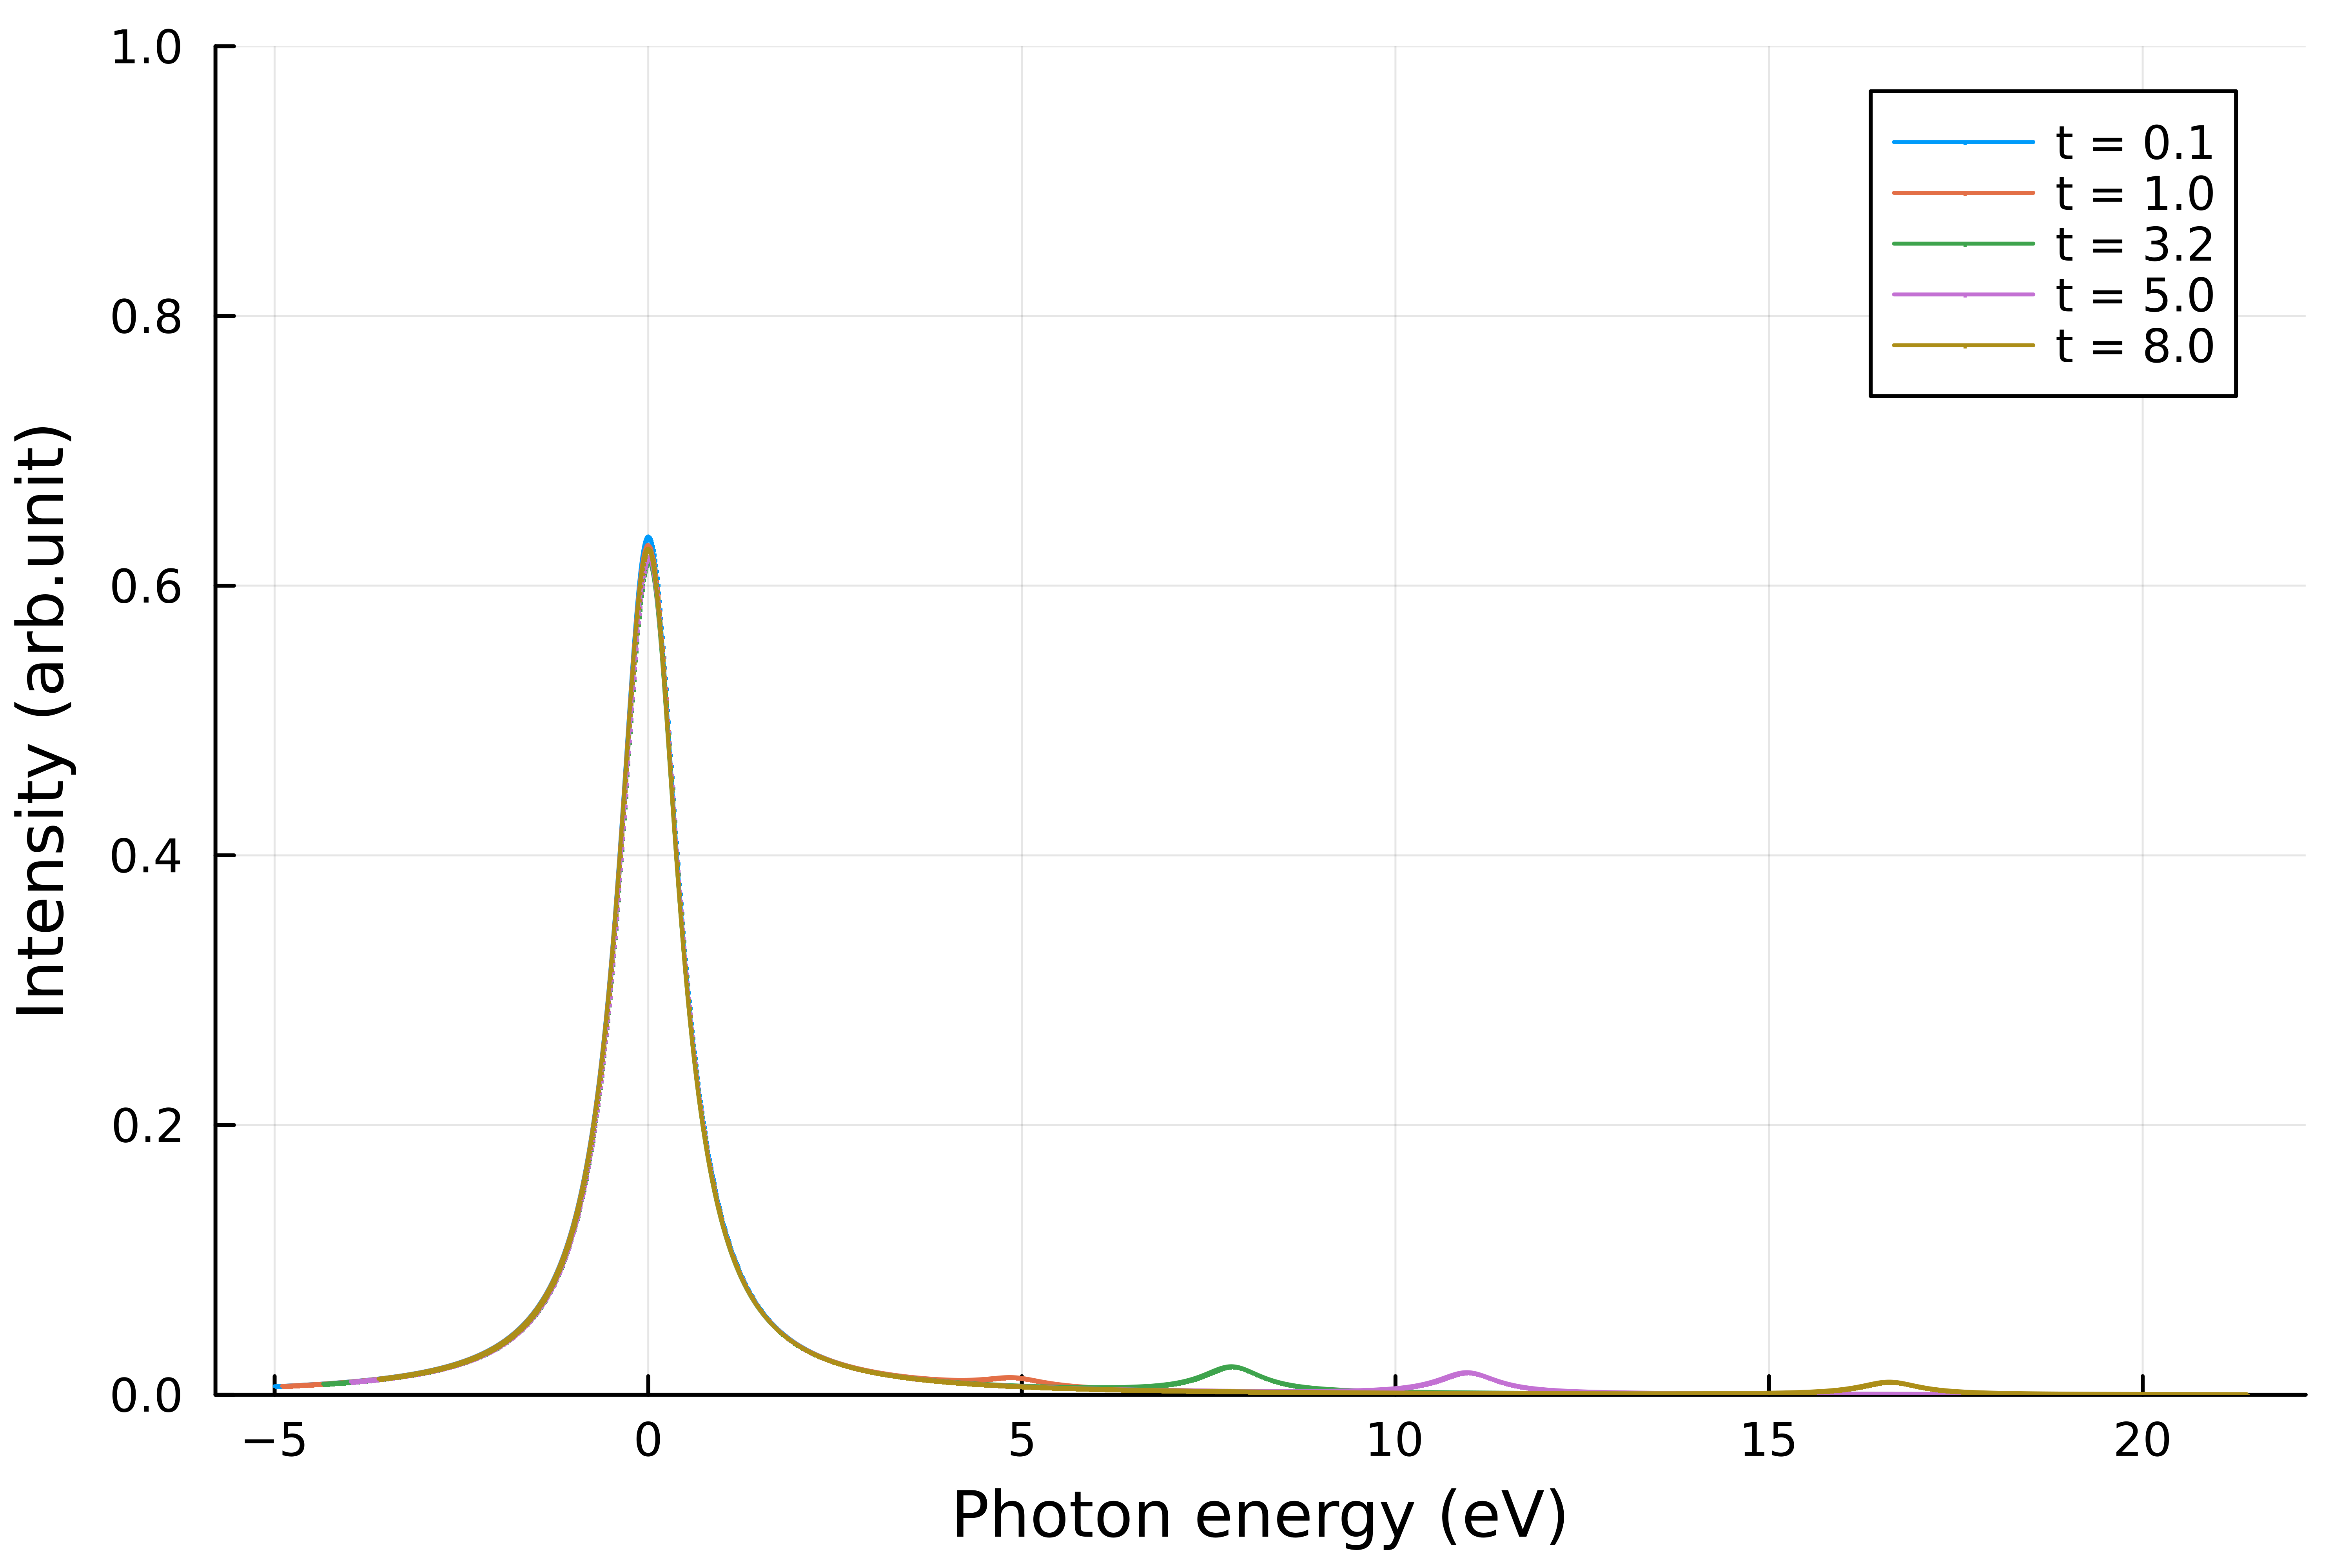

In [60]:
# tを変化

using LinearAlgebra
using Plots
using DelimitedFiles

# プロットの初期化
p = plot(dpi=1000)

# パラメータ設定
t_values = [0.1, 1, 3.2, 5, 8]
delta = 9
Ucf = 10.2
smalldelta = 0.5
Uff = Ucf / 1.8

for t in t_values
    # HgとHfの定義（省略）
    Hg =  [
   0 t
   t delta ]
Hf =  [
   0 t
   t delta - Ucf + Uff  ]
Eg,Vg = eigen(Hg)
Ef,Vf = eigen(Hf)
function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end
function F2(Eg,Vg,Ef,Vf,Eb)
    return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

    # データの保存用配列
    data = []

    for Eb in -5:0.01:20
        ints = (-1 / π) * imag(F1(Eg[1], Vg, Ef[1], Vf, Eb) + F2(Eg[1], Vg, Ef[2], Vf, Eb))
        push!(data, [Eb, ints])
    end

    # データを x と y に分割
    data = hcat(data...)
    x = data[1, :]
    y = data[2, :]

    # yの最大値とその位置を取得
    ymax = maximum(y)
    xmax = x[argmax(y)]

    # xを最大値の位置を原点にずらしてプロット
    x_shifted = x .- xmax

    # プロットを作成
    plot!(p, x_shifted, y, xlabel="Photon energy (eV)", ylabel="Intensity (arb.unit)", label="t = $t", marker=:auto, markersize=0, ylims=(0, 1))
end

display(p)